# **Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the dataset

In [9]:
# Read CSV through pandas 
df=pd.read_csv("spam_ham_dataset.csv")

In [10]:
# load first 5 dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Check the shape of the dataset

In [11]:
print(f"The number of rows in a dataset {df.shape[0]}")
print(f"The number of columns in a dataset {df.shape[1]}")

The number of rows in a dataset 5171
The number of columns in a dataset 4


In [12]:
# lets see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


- This info tell that there are two numericals and two categoricals Dtype

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


---
# **Check the Null values**

In [14]:
# Check the null values in a given dataset
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

- No null values in a dataset

In [15]:
# Check the duplicated values 
print(f"Duplicated values in a dataset: {df.duplicated().sum()}")

Duplicated values in a dataset: 0


## Lets check the label column 

In [16]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

---
# **Data Visulization**

- In label column its clearly understand that ham(3672) counting is higher then spam(1499)

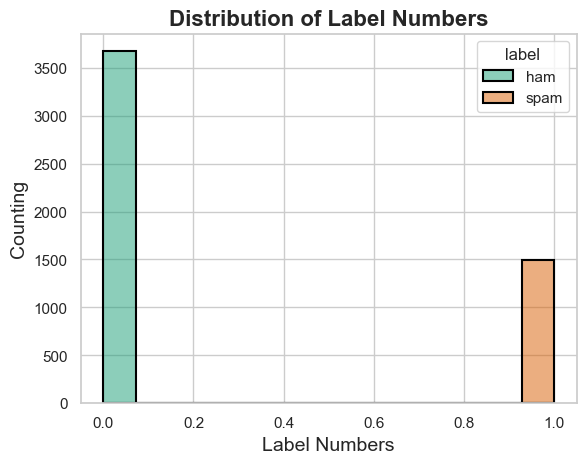

In [17]:
# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()


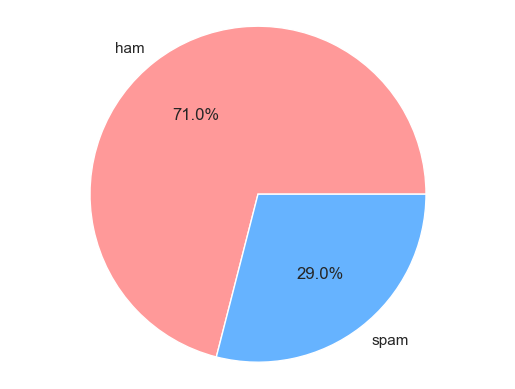

In [18]:
# lets check through pie chart
labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


---
# **Data Preprocessing**

In [19]:
# Removing unnecessary  column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [20]:
# Now lets check dataset again
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
# Create the function to preprocess the text

def clean_text(text):
    
    # Remove the punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the words
    words = text.split()
    
    # Remove stopwords and apply stemming (the library we use)
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)


In [22]:
#Let check the dataset again 
df.head(10)["clean_text"]

0    subject enron methanol meter 988291 follow not...
1    subject hpl nom januari 9 2001 see attach file...
2    subject neon retreat ho ho ho around wonder ti...
3    subject photoshop window offic cheap main tren...
4    subject indian spring deal book teco pvr reven...
5    subject ehronlin web address chang messag inte...
6    subject spring save certif take 30 save 30 use...
7    subject look medic best sourc difficult make m...
8    subject nom actual flow 2 26 agre forward meli...
9    subject nomin oct 21 23 2000 see attach file h...
Name: clean_text, dtype: object

# **Machine learning**

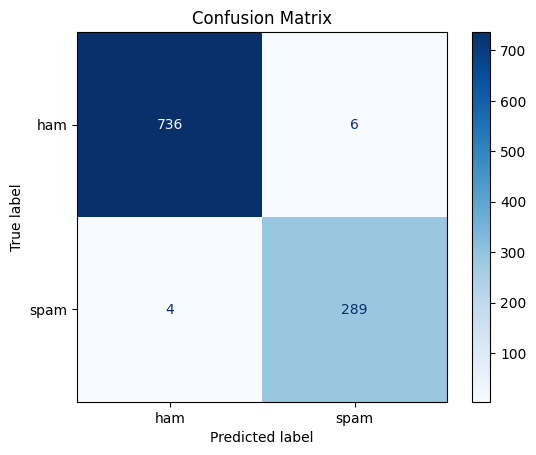

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)  # Ensure best_model is the trained SVM model

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [23]:
tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform(df["clean_text"])
y=df["label_num"]

In [24]:
X_train, X_text, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42)

In [25]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
}

best_results = {}
best_model_name = None
best_accuracy = 0.0 

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training  the model
    y_pred = model.predict(X_text)  # Predict on the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    best_results[name] = accuracy  # Store accuracy in the results dictionary

    # Display accuracy and classification report for the current model
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Display the model with the best accuracy at the end
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")


Naive Bayes Accuracy: 0.92
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.72      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035

SVM Accuracy: 0.99
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       742
           1       0.96      0.99      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035


Best Model:
SVM with Accuracy: 0.99


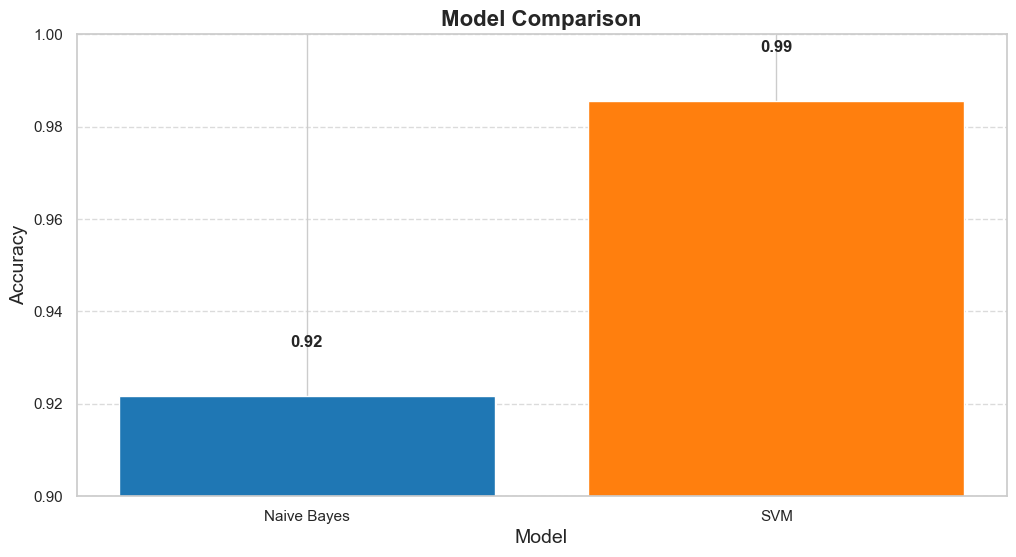

In [26]:
# Visualize the models Accuracy 

# Define a color palette
colors = ['#1f77b4', '#ff7f0e']  # Example colors: blue and orange

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Assuming 'df' is your dataset and it has columns 'clean_text' and 'label_num'
X = df['clean_text']  # Features
y = df['label_num']   # Target (0 for ham, 1 for spam)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Test the model
y_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model and vectorizer
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully!")


SVM Accuracy: 0.9884057971014493
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

Model and vectorizer saved successfully!


# **Testing the Model**

In [4]:
# Load the trained SVM model
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Function to test emails
def predict_email(text):
    # Preprocess the text (ensure preprocessing matches what you did during training)
    processed_text = text.lower()  # Add other preprocessing steps if needed
    vectorized_text = vectorizer.transform([processed_text])  # Transform text
    prediction = svm_model.predict(vectorized_text)
    return "Spam" if prediction[0] == 1 else "Ham"

# Test example
test_email = "You have won a free vacation!"
print(f"Email: {test_email}")
print(f"Prediction: {predict_email(test_email)}")


Email: You have won a free vacation!
Prediction: Spam


In [6]:
import pickle

# Load the trained SVM model
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Function to test emails
def predict_email(text):
    """
    Function to classify a single email as Ham or Spam.
    Args:
        text (str): The email text to classify.
    Returns:
        str: "Ham" if the email is not spam, otherwise "Spam".
    """
    # Preprocess the text (ensure preprocessing matches what you did during training)
    processed_text = text.lower()  # Add other preprocessing steps if needed
    vectorized_text = vectorizer.transform([processed_text])  # Transform text
    prediction = svm_model.predict(vectorized_text)
    return "Ham" if prediction[0] == 0 else "Spam"

# Test example
test_email = "Meeting scheduled for tomorrow. Please check the agenda."
print(f"Email: {test_email}")
print(f"Prediction: {predict_email(test_email)}")


Email: Meeting scheduled for tomorrow. Please check the agenda.
Prediction: Ham


In [14]:
import pickle

# Load the saved SVM model and TF-IDF vectorizer
with open('svm_model.pkl', 'rb') as model_file, open('vectorizer.pkl', 'rb') as vectorizer_file:
    svm_model = pickle.load(model_file)
    tfidf_vectorizer = pickle.load(vectorizer_file)


In [19]:
# Test emails
emails_to_test = [
    "Meeting scheduled for tomorrow. Please check the agenda.",
    "You have won a free vacation! Claim your prize now."
]

# Predict each email
for email in emails_to_test:
    result = predict_email(email, svm_model, tfidf_vectorizer)  # Use SVM model
    print(f"Email: {email}\nPrediction: {result}\n")


Email: Meeting scheduled for tomorrow. Please check the agenda.
Prediction: ham

Email: You have won a free vacation! Claim your prize now.
Prediction: spam



In [11]:
def predict_email(input_email, model, vectorizer):
    from nltk.corpus import stopwords
    from nltk.stem import SnowballStemmer
    import string
    import nltk

    # Ensure nltk resources are downloaded
    nltk.download('stopwords', quiet=True)
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    
    # Text cleaning function
    def clean_text(text):
        text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
        words = text.split()  # Tokenize
        words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]  # Remove stopwords and stem
        return ' '.join(words)

    # Clean and vectorize the input email
    cleaned_email = clean_text(input_email)
    vectorized_email = vectorizer.transform([cleaned_email])  # Vectorize the input email
    prediction = model.predict(vectorized_email)  # Predict the label
    return "spam" if prediction[0] == 1 else "ham"


In [21]:
# Test emails
test_emails = [
    "Meeting scheduled for tomorrow. Please check the agenda.",
    "Congratulations! You've won a free vacation to Hawaii. Click here to claim!",
    "Urgent: Your account has been compromised. Please reset your password immediately.",
    "Join us for the team lunch tomorrow at noon in the cafeteria."
]

# Predict each email
for email in test_emails:
    result = predict_email(email, svm_model, tfidf_vectorizer)
    print(f"Email: {email}\nPrediction: {result}\n")


Email: Meeting scheduled for tomorrow. Please check the agenda.
Prediction: ham

Email: Congratulations! You've won a free vacation to Hawaii. Click here to claim!
Prediction: spam

Email: Urgent: Your account has been compromised. Please reset your password immediately.
Prediction: ham

Email: Join us for the team lunch tomorrow at noon in the cafeteria.
Prediction: ham



In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam_ham_dataset.csv')  # Replace with your dataset path


In [5]:
X = data['text']  # Replace 'text' with the column containing the input features
y = data['label']  # Replace 'label' with the column containing the target variable


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])  # Convert text into feature vectors


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('spam_ham_dataset.csv')  # Replace with your actual dataset path

# Define features (X) and target (y)
X = data['text']  # Replace 'text' with the column containing the input features
y = data['label']  # Replace 'label' with the column containing the target variable

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)  # Transform text into numerical features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of polynomial kernel
}

# Initialize the SVM model
svc = SVC()

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9903273574820812

Test Set Accuracy: 0.9903381642512077

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

